DETERMINACIÓN DEL K ÓPTIMO PARA K-MEANS
✅ Datos PCA cargados exitosamente: (980, 8)
Columnas disponibles: ['Unique user id', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7']

Datos para análisis: (980, 7)
Componentes principales: ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7']

MÉTODO DEL CODO (ELBOW METHOD)
Calculando inercias y scores de silhouette...
Probando k=1... Inercia: 8888.72
Probando k=2... Inercia: 6861.14, Silhouette: 0.231
Probando k=3... Inercia: 6231.84, Silhouette: 0.238
Probando k=4... Inercia: 5606.71, Silhouette: 0.167
Probando k=5... Inercia: 5159.53, Silhouette: 0.175
Probando k=6... Inercia: 4786.26, Silhouette: 0.158
Probando k=7... Inercia: 4484.59, Silhouette: 0.152
Probando k=8... Inercia: 4252.83, Silhouette: 0.153
Probando k=9... Inercia: 4050.62, Silhouette: 0.157
Probando k=10... Inercia: 3894.63, Silhouette: 0.158


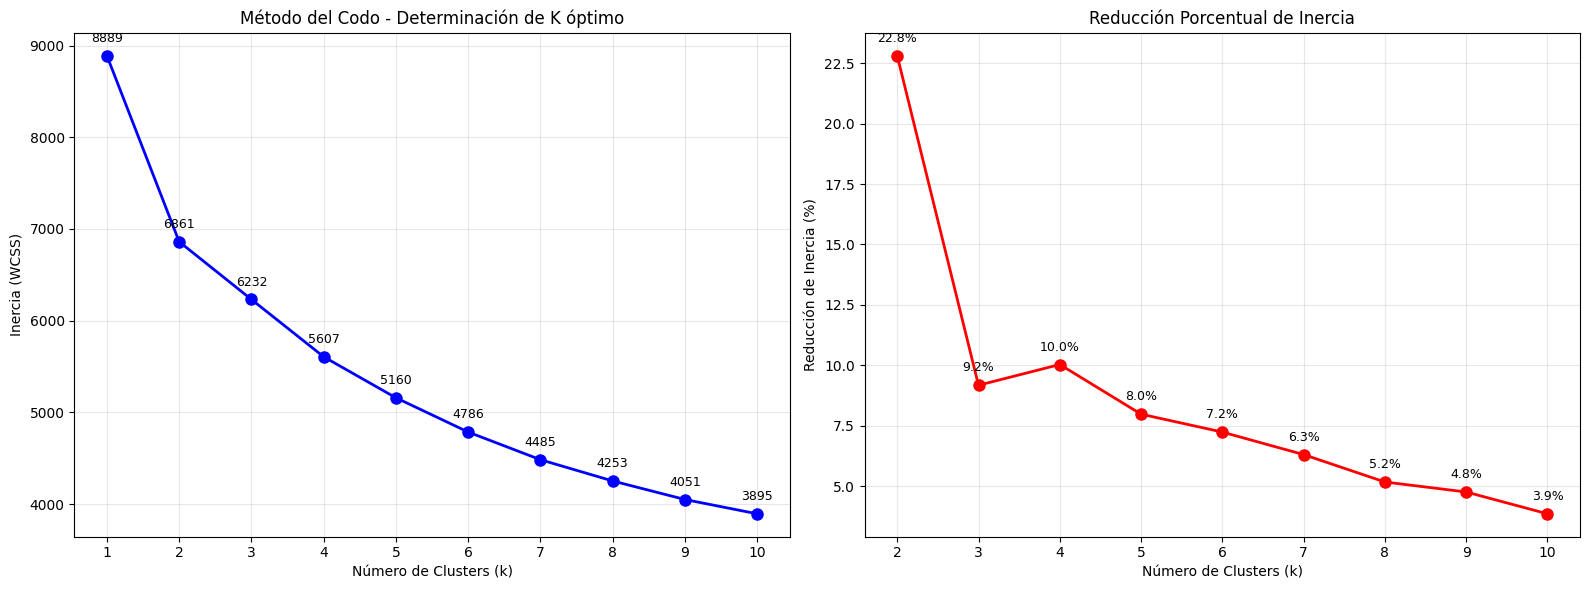


ANÁLISIS DE SILHOUETTE

Analizando k=2:
  Score promedio de silhouette: 0.231
    Cluster 0: 605 usuarios, silhouette promedio: 0.263
    Cluster 1: 375 usuarios, silhouette promedio: 0.181

Analizando k=3:
  Score promedio de silhouette: 0.238
    Cluster 0: 606 usuarios, silhouette promedio: 0.241
    Cluster 1: 353 usuarios, silhouette promedio: 0.226
    Cluster 2: 21 usuarios, silhouette promedio: 0.366

Analizando k=4:
  Score promedio de silhouette: 0.167
    Cluster 0: 357 usuarios, silhouette promedio: 0.159
    Cluster 1: 21 usuarios, silhouette promedio: 0.359
    Cluster 2: 320 usuarios, silhouette promedio: 0.189
    Cluster 3: 282 usuarios, silhouette promedio: 0.137

Analizando k=5:
  Score promedio de silhouette: 0.175
    Cluster 0: 211 usuarios, silhouette promedio: 0.218
    Cluster 1: 21 usuarios, silhouette promedio: 0.350
    Cluster 2: 271 usuarios, silhouette promedio: 0.126
    Cluster 3: 381 usuarios, silhouette promedio: 0.188
    Cluster 4: 96 usuarios, sil

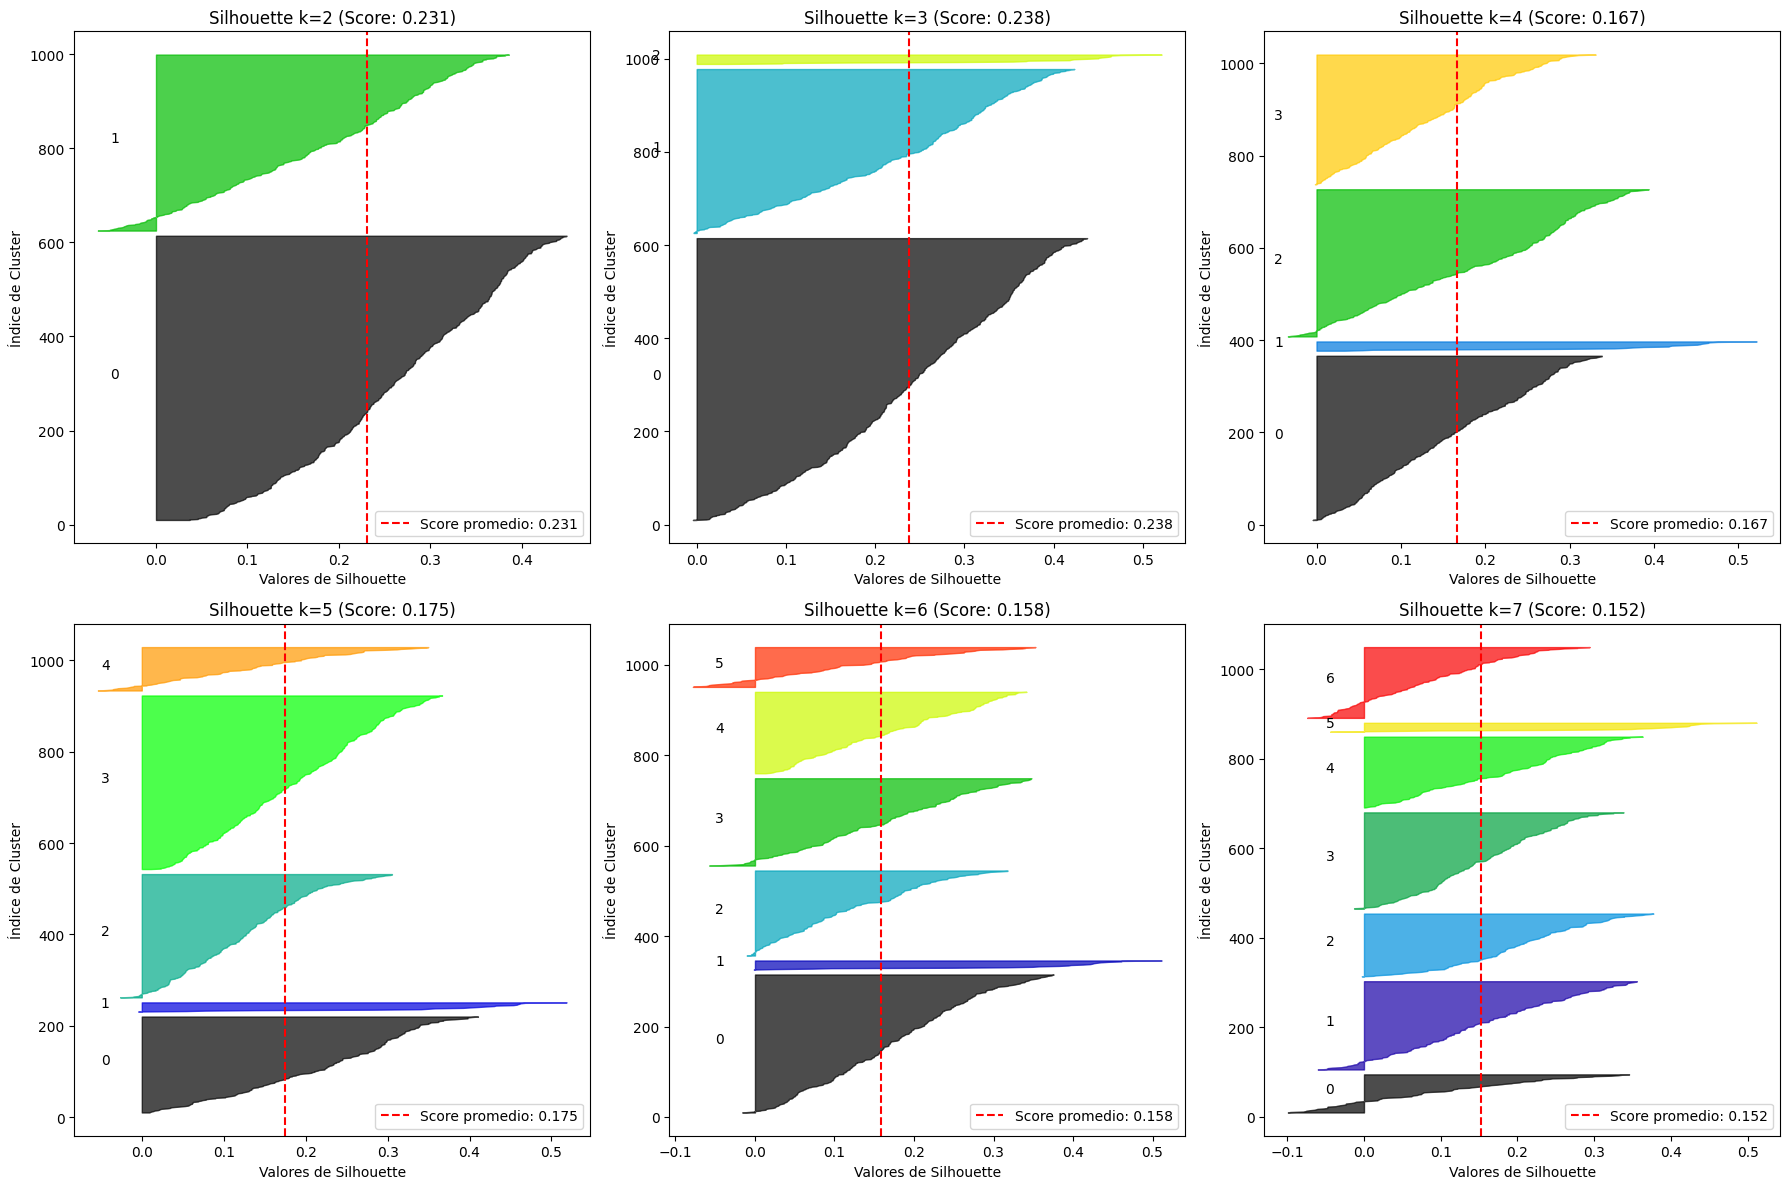

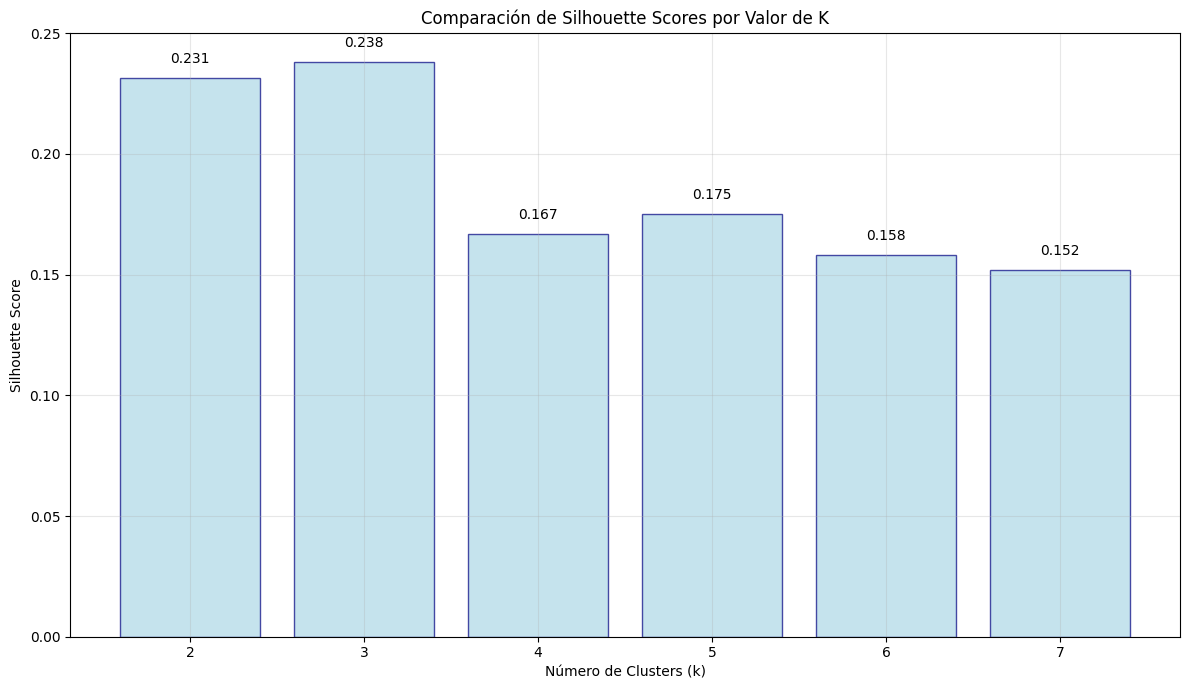


RESUMEN DE RESULTADOS Y RECOMENDACIONES

📊 MÉTODO DEL CODO:
   Mayor reducción de inercia: k=2 (22.8%)
   Análisis de reducción de inercia:
     k=2: 22.8% de reducción
     k=3: 9.2% de reducción
     k=4: 10.0% de reducción
     k=5: 8.0% de reducción
     k=6: 7.2% de reducción
     k=7: 6.3% de reducción
     k=8: 5.2% de reducción
     k=9: 4.8% de reducción
     k=10: 3.9% de reducción

📈 ANÁLISIS DE SILHOUETTE:
   Mejor k según silhouette: k=3 (score: 0.238)
   Ranking de k por score de silhouette:
     1. k=3: 0.238
     2. k=2: 0.231
     3. k=5: 0.175
     4. k=4: 0.167
     5. k=6: 0.158
     6. k=7: 0.152

🎯 RECOMENDACIÓN FINAL PARA K:
   Método del codo sugiere: k=2
   Silhouette sugiere: k=3
   ✅ Ambos métodos convergen: k=3 es ÓPTIMO

GUARDANDO RESULTADOS DE EVALUACIÓN
✅ Archivo generado:
   - k_evaluation_results.csv: Métricas de evaluación para cada k

🎉 EVALUACIÓN DE K COMPLETADA
   📋 Resultados guardados en: k_evaluation_results.csv
   🎯 K óptimo recomendado: k=3
  

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import warnings
warnings.filterwarnings('ignore')

# 1. Cargar los datos transformados por PCA
print("=" * 70)
print("DETERMINACIÓN DEL K ÓPTIMO PARA K-MEANS")
print("=" * 70)

# Cargar los datos PCA generados anteriormente
try:
    df_pca = pd.read_csv('tripadvisor_pca_projection.csv')
    print(f"✅ Datos PCA cargados exitosamente: {df_pca.shape}")
    print(f"Columnas disponibles: {list(df_pca.columns)}")
    
    # Separar ID de usuario de los componentes principales
    user_ids = df_pca['Unique user id']
    X_pca = df_pca.drop('Unique user id', axis=1)
    
    print(f"\nDatos para análisis: {X_pca.shape}")
    print(f"Componentes principales: {list(X_pca.columns)}")
    
except FileNotFoundError:
    print("❌ Error: No se encuentra 'tripadvisor_pca_projection.csv'")
    print("Ejecuta primero el script PCA.py para generar los datos transformados")
    exit()

# 2. Análisis del método del Codo (Elbow Method)
print(f"\n" + "=" * 50)
print("MÉTODO DEL CODO (ELBOW METHOD)")
print("=" * 50)

# Rango de clusters a probar
k_range = range(1, 11)
inertias = []
silhouette_scores = []

print("Calculando inercias y scores de silhouette...")
for k in k_range:
    print(f"Probando k={k}...", end=" ")
    
    # Entrenar K-means
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, max_iter=300)
    kmeans.fit(X_pca)
    
    # Guardar inercia
    inertias.append(kmeans.inertia_)
    
    # Calcular silhouette score (solo para k > 1)
    if k > 1:
        silhouette_avg = silhouette_score(X_pca, kmeans.labels_)
        silhouette_scores.append(silhouette_avg)
        print(f"Inercia: {kmeans.inertia_:.2f}, Silhouette: {silhouette_avg:.3f}")
    else:
        silhouette_scores.append(0)  # No hay silhouette para k=1
        print(f"Inercia: {kmeans.inertia_:.2f}")

# 3. Visualización del método del codo
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico de inercias (método del codo)
ax1.plot(k_range, inertias, 'bo-', linewidth=2, markersize=8)
ax1.set_xlabel('Número de Clusters (k)')
ax1.set_ylabel('Inercia (WCSS)')
ax1.set_title('Método del Codo - Determinación de K óptimo')
ax1.grid(True, alpha=0.3)
ax1.set_xticks(k_range)

# Añadir valores en los puntos
for i, (k, inercia) in enumerate(zip(k_range, inertias)):
    ax1.annotate(f'{inercia:.0f}', (k, inercia), textcoords="offset points", 
                xytext=(0,10), ha='center', fontsize=9)

# Calcular y mostrar la diferencia relativa (para identificar el codo)
diferencias = []
for i in range(1, len(inertias)):
    diff = (inertias[i-1] - inertias[i]) / inertias[i-1] * 100
    diferencias.append(diff)

# Gráfico de diferencias porcentuales
ax2.plot(k_range[1:], diferencias, 'ro-', linewidth=2, markersize=8)
ax2.set_xlabel('Número de Clusters (k)')
ax2.set_ylabel('Reducción de Inercia (%)')
ax2.set_title('Reducción Porcentual de Inercia')
ax2.grid(True, alpha=0.3)
ax2.set_xticks(k_range[1:])

for i, (k, diff) in enumerate(zip(k_range[1:], diferencias)):
    ax2.annotate(f'{diff:.1f}%', (k, diff), textcoords="offset points", 
                xytext=(0,10), ha='center', fontsize=9)

plt.tight_layout()
plt.show()

# 4. Análisis de Silhouette detallado
print(f"\n" + "=" * 50)
print("ANÁLISIS DE SILHOUETTE")
print("=" * 50)

# Probar un rango más específico para silhouette
k_silhouette_range = range(2, 8)
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

silhouette_results = {}

for idx, k in enumerate(k_silhouette_range):
    print(f"\nAnalizando k={k}:")
    
    # Entrenar K-means
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, max_iter=300)
    cluster_labels = kmeans.fit_predict(X_pca)
    
    # Calcular silhouette score
    silhouette_avg = silhouette_score(X_pca, cluster_labels)
    sample_silhouette_values = silhouette_samples(X_pca, cluster_labels)
    
    # Guardar resultados
    silhouette_results[k] = {
        'avg_score': silhouette_avg,
        'sample_values': sample_silhouette_values
    }
    
    print(f"  Score promedio de silhouette: {silhouette_avg:.3f}")
    
    # Crear gráfico de silhouette
    ax = axes[idx]
    y_lower = 10
    
    for i in range(k):
        # Valores de silhouette para cluster i
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        color = plt.cm.nipy_spectral(float(i) / k)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values,
                        facecolor=color, edgecolor=color, alpha=0.7)
        
        # Etiquetar cluster
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10
    
    ax.set_xlabel('Valores de Silhouette')
    ax.set_ylabel('Índice de Cluster')
    ax.set_title(f'Silhouette k={k} (Score: {silhouette_avg:.3f})')
    
    # Línea vertical para el score promedio
    ax.axvline(x=silhouette_avg, color="red", linestyle="--", 
               label=f'Score promedio: {silhouette_avg:.3f}')
    ax.legend()
    
    # Información por cluster
    for i in range(k):
        cluster_silhouette = sample_silhouette_values[cluster_labels == i]
        print(f"    Cluster {i}: {len(cluster_silhouette)} usuarios, "
              f"silhouette promedio: {cluster_silhouette.mean():.3f}")

plt.tight_layout()
plt.show()

# 5. Gráfico comparativo de Silhouette Scores
fig, ax = plt.subplots(1, 1, figsize=(12, 7))

metrics_k = list(silhouette_results.keys())
metrics_scores = [silhouette_results[k]['avg_score'] for k in metrics_k]

bars = ax.bar(metrics_k, metrics_scores, alpha=0.7, color='lightblue', edgecolor='navy')
ax.set_xlabel('Número de Clusters (k)')
ax.set_ylabel('Silhouette Score')
ax.set_title('Comparación de Silhouette Scores por Valor de K')
ax.grid(True, alpha=0.3)

# Añadir valores sobre las barras
for bar, score in zip(bars, metrics_scores):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.005,
             f'{score:.3f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# 6. Resumen de resultados y recomendaciones
print(f"\n" + "=" * 70)
print("RESUMEN DE RESULTADOS Y RECOMENDACIONES")
print("=" * 70)

# Análisis del método del codo
print("\n📊 MÉTODO DEL CODO:")
max_diff_idx = np.argmax(diferencias)
codo_k = k_range[max_diff_idx + 1]
print(f"   Mayor reducción de inercia: k={codo_k} ({diferencias[max_diff_idx]:.1f}%)")

# Buscar el "codo" manualmente (donde la mejora se estabiliza)
print("   Análisis de reducción de inercia:")
for i, (k, diff) in enumerate(zip(k_range[1:], diferencias)):
    print(f"     k={k}: {diff:.1f}% de reducción")

# Análisis de silhouette
print(f"\n📈 ANÁLISIS DE SILHOUETTE:")
best_k_silhouette = max(silhouette_results.keys(), 
                       key=lambda k: silhouette_results[k]['avg_score'])
best_silhouette_score = silhouette_results[best_k_silhouette]['avg_score']

print(f"   Mejor k según silhouette: k={best_k_silhouette} "
      f"(score: {best_silhouette_score:.3f})")

print("   Ranking de k por score de silhouette:")
sorted_k = sorted(silhouette_results.keys(), 
                 key=lambda k: silhouette_results[k]['avg_score'], reverse=True)
for i, k in enumerate(sorted_k):
    score = silhouette_results[k]['avg_score']
    print(f"     {i+1}. k={k}: {score:.3f}")

# 7. Recomendación final
print(f"\n🎯 RECOMENDACIÓN FINAL PARA K:")
print(f"   Método del codo sugiere: k={codo_k}")
print(f"   Silhouette sugiere: k={best_k_silhouette}")

# Decidir k óptimo basado en ambos métodos
if abs(codo_k - best_k_silhouette) <= 1:
    k_optimo = best_k_silhouette
    print(f"   ✅ Ambos métodos convergen: k={k_optimo} es ÓPTIMO")
else:
    k_optimo = best_k_silhouette  # Priorizamos silhouette
    print(f"   ⚖️  Métodos difieren. Recomendamos k={k_optimo} (mayor silhouette)")
    print(f"      También considera k={codo_k} como alternativa")

# 8. Guardar resultados de la evaluación
print(f"\n" + "=" * 50)
print("GUARDANDO RESULTADOS DE EVALUACIÓN")
print("=" * 50)

# Guardar métricas de evaluación para todos los k probados
evaluation_results = pd.DataFrame({
    'k': k_range,
    'inertia': inertias,
    'silhouette_score': [0] + silhouette_scores[1:]  # k=1 no tiene silhouette
})

# Añadir reducción porcentual de inercia
evaluation_results['inertia_reduction_pct'] = [0] + diferencias

evaluation_results.to_csv('k_evaluation_results.csv', index=False)

print("✅ Archivo generado:")
print("   - k_evaluation_results.csv: Métricas de evaluación para cada k")

print(f"\n🎉 EVALUACIÓN DE K COMPLETADA")
print(f"   📋 Resultados guardados en: k_evaluation_results.csv")
print(f"   🎯 K óptimo recomendado: k={k_optimo}")
print(f"   📊 Silhouette score del k óptimo: {best_silhouette_score:.3f}")

print(f"\n" + "=" * 50)
print("PRÓXIMOS PASOS")
print("=" * 50)
print(f"✅ Usa k={k_optimo} para entrenar tu modelo K-means final")
print("✅ El archivo 'k_evaluation_results.csv' contiene todas las métricas")
print("✅ Puedes revisar k alternativas si es necesario")